**1. IMPORTING THE DATA SETS AND LIBRARIES**

**1.1 IMPORTING THE REQUIRED LIBRARIES FOR EDA**

In [332]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

**1.2 LOADING THE DATA INTO THE DATAFRAME**

In [333]:
df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",sheet_name='Data')

In [ ]:
# Displaying the top 5 rows
df.head(5)

In [ ]:
# Displaying the bottom 5 rows
df.tail(5)

**1.2 CHECKING DATATYPES AND STATISTICAL SUMMARY**

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.shape

In [ ]:
pd.isna(df)

In [ ]:
df.isnull().sum()

In [ ]:
for column in df.columns:
    print(f' Unique values in {column} is {len(df[column].unique())}')

**2.CHECKING IF DATA IS REQUIRED TO BE CLEANED FOR ANY OF THE** **VARIABLES** 

**2.1 Dropping Irrelevant Columns**

This step is certainly needed in the EDA becuase sometimes there would be columns of no use and dropping them would be relevant. Over here the columns ID and ZIP Code may not be relevant to play an important role in giving loan to a borrower.

In [334]:
df=df.drop(['ID','ZIP Code'],axis=1)
df.head(5)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In a machine learning model, it is neccessary to seperate signal from the noise. Hence ID column which definitely does not have any signal is being dropped. Also, the experience column seems to have some negative values. We can replace and impute those values, but here the column is dropped since it is highly correlated with age column.

In [ ]:
experience=df['Experience']
age=df['Age']
correlation = experience.corr(age)
correlation

In [337]:
df=df.drop(['Experience'],axis=1)
df.head(5)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


 **2.2 Dropping Duplicates**

In [336]:
duplicate_rows_df=df[df.duplicated()]
print("No.Of Duplicate Rows Are :",duplicate_rows_df.shape)

No.Of Duplicate Rows Are : (13, 12)


In [338]:
df.drop_duplicates()
df.shape

(5000, 11)

Since the dimensionality of the array remains same,there are no duplicate rows present to be dropped.

**2.3 Missing Values**

In [ ]:
df.isnull().sum()

Missing values are replaced with the measures of central tendency - mean, median, and mode and there are no missing values prsent in the data.

**3. EXPLORATORY DATA ANALYSIS**

**Number of unique elements in each column**

In [339]:
df.nunique()

Age                    45
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

**Number of people with zero mortgage**

In [340]:
print((df['Mortgage'].values == 0).sum())

3462


**Number of people with zero credit card spending per month**

In [ ]:
print((df['CCAvg'].values==0).sum())

**Value counts of all categorical columns**


In [341]:
categorical_columns = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Personal Loan']

for column in categorical_columns:
    print(f'Value counts for {column} column:')
    print(df[column].value_counts())
    print()

Value counts for Family column:
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

Value counts for Education column:
1    2096
3    1501
2    1403
Name: Education, dtype: int64

Value counts for Securities Account column:
0    4478
1     522
Name: Securities Account, dtype: int64

Value counts for CD Account column:
0    4698
1     302
Name: CD Account, dtype: int64

Value counts for Online column:
1    2984
0    2016
Name: Online, dtype: int64

Value counts for CreditCard column:
0    3530
1    1470
Name: CreditCard, dtype: int64

Value counts for Personal Loan column:
0    4520
1     480
Name: Personal Loan, dtype: int64



**Univariate Analysis**

In [ ]:
sns.distplot(df.Age)
##Age has a symmetric distribution.

In [ ]:
sns.distplot(df.Income)
##Income has a right skewed distribution.

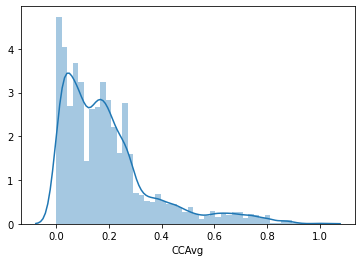

In [394]:
sns.distplot(df.CCAvg)
##CCAvg has a right skewed distribution.

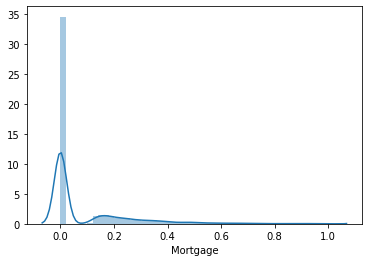

In [396]:
sns.distplot(df.Mortgage)

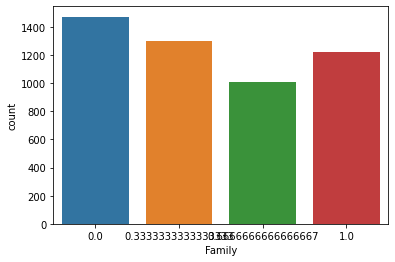

In [397]:
sns.countplot(df.Family)

In [ ]:
sns.countplot(df.Education)

In [ ]:
plt.hist(df['Mortgage'])

**Bivariate Analysis**

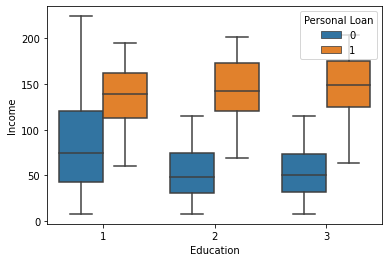

In [342]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df)

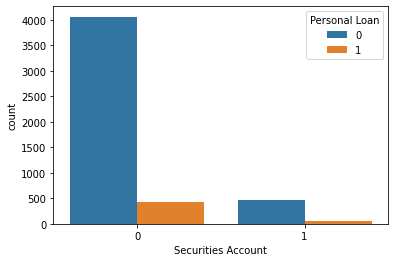

In [343]:
sns.countplot(x="Securities Account", data=df,hue="Personal Loan")

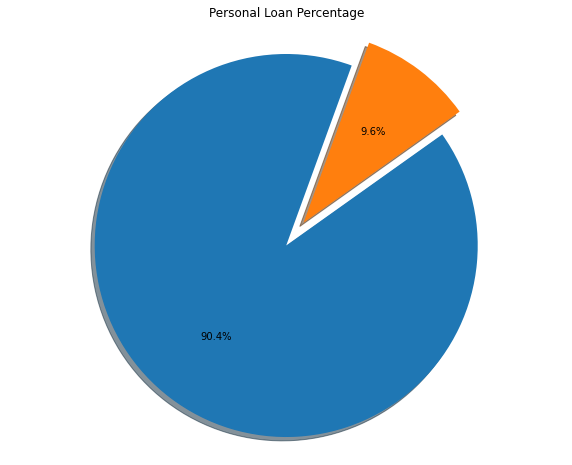

In [344]:
data=pd.DataFrame(df['Personal Loan'].value_counts()).reset_index()
data.columns=['Labels','Personal Loan']
fig1,ax1=plt.subplots(figsize=(10,8))
explode=(0,0.15)
ax1.pie(data['Personal Loan'],explode=explode,autopct='%1.1f%%',shadow=True,startangle=70)
ax1.axis('Equal')
plt.title('Personal Loan Percentage')
plt.show()

##9.6% Get Approved For Personal Loans.

In [347]:
corr = df.corr()

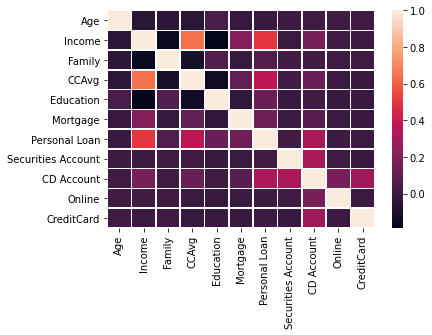

In [348]:
sns.heatmap(corr, linewidths=0.5)

**4. Transformations for the feature variables**

**Feature Scaling**

In [352]:
from sklearn.preprocessing import MinMaxScaler

In [353]:
columns_to_scale = ['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage']

for column in columns_to_scale:
    scaler = MinMaxScaler()
    df[column] = scaler.fit_transform(df[column].values.reshape(-1, 1))

In [354]:
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0.045455,0.189815,1.000000,0.16,0.0,0.0,0,1,0,0,0
1,0.500000,0.120370,0.666667,0.15,0.0,0.0,0,1,0,0,0
2,0.363636,0.013889,0.000000,0.10,0.0,0.0,0,0,0,0,0
3,0.272727,0.425926,0.000000,0.27,0.5,0.0,0,0,0,0,0
4,0.272727,0.171296,1.000000,0.10,0.5,0.0,0,0,0,0,1


**5. Splitting The Data Into Training And Test Set In The Ratio Of 70:30**

In [355]:
x = df.drop(['Personal Loan'], axis=1)
y = df['Personal Loan'].values

x.shape, y.shape

((5000, 10), (5000,))

In [356]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3500, 10), (1500, 10), (3500,), (1500,))

In [360]:
class_names = ['Will Not Take Loan', 'Will Take Loan']

**6. Logistic Regression**

In [400]:
from sklearn.linear_model import LogisticRegression


In [401]:
model=LogisticRegression()

In [402]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [403]:
y_predict=model.predict(x_test)

In [404]:
print(y_predict)

[0 0 0 ... 0 0 0]


**7. Printing All The Metrics Related For Evaluating The Model Performance**

In [405]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import precision_score, recall_score

In [406]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print('R2 Score:', metrics.r2_score(y_test,y_predict))

Mean Absolute Error:  0.048666666666666664
Root Mean Squared Error: 0.2206052281036573
R2 Score: 0.376480502915452


In [407]:
print(metrics.accuracy_score(y_test,y_predict))

0.9513333333333334


Logistic Regression Results: 
Training Accuracy: 0.95
Testing Accuracy: 0.95
Precision: 0.81
Recall: 0.56


Text(0.5, 1.0, 'Precision-Recall Curve for Logistic Regression')

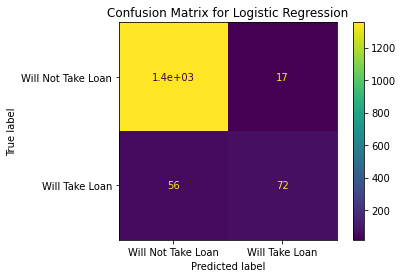

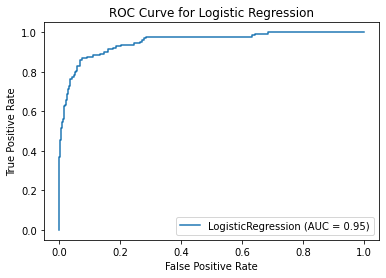

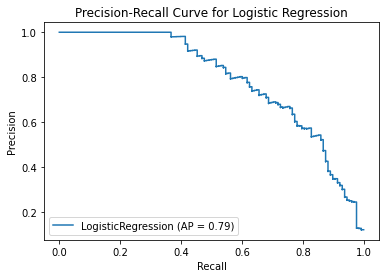

In [408]:
print('Logistic Regression Results: ')

train_score = model.score(x_train, y_train)
print('Training Accuracy:', train_score.round(2))
test_score = model.score(x_test, y_test)
print('Testing Accuracy:', test_score.round(2))

y_pred_logi = model.predict(x_test)

precision_logi = precision_score(y_test, y_pred_logi, labels=class_names).round(2)
print('Precision:', precision_logi)
recall_logi = recall_score(y_test, y_pred_logi).round(2)
print('Recall:', recall_logi)

plot_confusion_matrix(model, x_test, y_test, display_labels=class_names)
plt.title('Confusion Matrix for Logistic Regression')

plot_roc_curve(model, x_test, y_test)
plt.title('ROC Curve for Logistic Regression')

plot_precision_recall_curve(model, x_test, y_test)
plt.title('Precision-Recall Curve for Logistic Regression')

**8. Building Other Classification Algorithms And Comparing Their Peformance**

In [413]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [414]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion="entropy")))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.947714 (0.007234)
KNN: 0.957429 (0.007051)
CART: 0.979714 (0.006571)
NB: 0.883429 (0.015269)
SVM: 0.953714 (0.006490)
Random Forest: 0.986857 (0.004815)


**We Get The Best Result From The Random Forest Classifier**